In [1]:
# Feature Importance
#!pip install plotly

In [2]:
#Import the Libraries

#Dataframe and numerical library
import pandas as pd 
import numpy as np

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Machine Learming Model
from sklearn.linear_model import LogisticRegression 

In [3]:
# df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/Leads.csv")
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/churn.csv")
df.sample(5)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
2044,No,80,yes,yes,30,184.2,132,31.31,167.5,109,14.24,212.8,114,9.58,10.0,10,2.70,0
258,Yes,92,yes,no,0,62.6,111,10.64,180.6,126,15.35,221.7,80,9.98,10.4,2,2.81,1
421,No,51,no,no,0,259.9,114,44.18,176.2,94,14.98,77.2,112,3.47,15.3,1,4.13,1
4851,No,39,no,no,0,189.6,89,32.23,251.6,116,21.39,230.9,105,10.39,5.4,8,1.46,3
2768,No,121,no,yes,44,116.0,85,19.72,150.1,120,12.76,246.8,98,11.11,12.0,2,3.24,1


In [4]:
print(df.shape)
df.isnull().sum()

(5000, 18)


churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64

In [5]:
#df.drop(['Lead Number','Prospect ID', 'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality','Tags','City','Lead Profile','What matters most to you in choosing a course','What is your current occupation','How did you hear about X Education','Specialization','Country'], axis=1, inplace=True)
#df.isnull().sum()

In [6]:
#df = df.fillna(0)
#print(df.isnull().sum())
#print(df.dtypes)

In [7]:
print(df.dtypes)
df.nunique()

churn                          object
accountlength                   int64
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls      int64
dtype: object


churn                            2
accountlength                  218
internationalplan                2
voicemailplan                    2
numbervmailmessages             48
totaldayminutes               1961
totaldaycalls                  123
totaldaycharge                1961
totaleveminutes               1879
totalevecalls                  126
totalevecharge                1659
totalnightminutes             1853
totalnightcalls                131
totalnightcharge              1028
totalintlminutes               170
totalintlcalls                  21
totalintlcharge                170
numbercustomerservicecalls      10
dtype: int64

In [8]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [9]:
numerics = ['int16', 'int32', 'int64','float64']
catDF = df.select_dtypes(exclude=numerics)
numDF = df.select_dtypes(include=numerics)

In [10]:
print(catDF.head())
numDF.head()

  churn internationalplan voicemailplan
0    No                no           yes
1    No                no           yes
2    No                no            no
3    No               yes            no
4    No               yes            no


,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [11]:
# Scale all numeric columns
numDF = pd.DataFrame(scaler.fit_transform(numDF.values), columns=numDF.columns, index=numDF.index)
numDF.head()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0.518519,1.470588,1.172414,0.384615,1.172890,-0.053156,-0.037037,-0.053819,0.653392,-0.346154,0.652459,-0.085714,-0.333333,-0.085106,0.0
1,0.129630,1.529412,-0.255172,0.884615,-0.255682,-0.081211,0.111111,-0.081597,0.796460,0.115385,0.796721,0.971429,-0.333333,0.978723,0.0
2,0.685185,0.000000,0.873103,0.538462,0.873377,-1.178295,0.370370,-1.178819,-0.557522,0.153846,-0.557377,0.542857,0.333333,0.542553,-1.0
3,-0.296296,0.000000,1.645517,-1.115385,1.646104,-2.053894,-0.444444,-2.053819,-0.051622,-0.423077,-0.052459,-1.057143,1.000000,-1.063830,1.0
4,-0.462963,0.000000,-0.184828,0.500000,-0.185065,-0.778147,0.814815,-0.777778,-0.199115,0.807692,-0.200000,-0.057143,-0.333333,-0.053191,2.0


In [12]:
# Drop the target variable from the DF
catDF.drop(['churn'], axis=1, inplace=True)

In [13]:
# Converting all the categorical variables to dummy variables
catDF = pd.get_dummies(catDF)
catDF.shape

(5000, 4)

In [14]:
catDF.head()

,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes
0,1,0,0,1
1,1,0,0,1
2,1,0,1,0
3,0,1,1,0
4,0,1,1,0


In [15]:
# Merging with the original data frame
# Preparing the X variables
X = pd.concat([catDF, numDF], axis=1)
print(X.shape)
# Preparing the Y variable
Y = df['churn']
# Tree models have trouble turning strings to float to labeling the target variable so there is a complete feature matrix
Y = Y.replace(to_replace=['No','Yes'],value=[0,1])
print(Y.shape)
X.head()

(5000, 19)
(5000,)


,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,1,0,0,1,0.518519,1.470588,1.172414,0.384615,1.172890,-0.053156,-0.037037,-0.053819,0.653392,-0.346154,0.652459,-0.085714,-0.333333,-0.085106,0.0
1,1,0,0,1,0.129630,1.529412,-0.255172,0.884615,-0.255682,-0.081211,0.111111,-0.081597,0.796460,0.115385,0.796721,0.971429,-0.333333,0.978723,0.0
2,1,0,1,0,0.685185,0.000000,0.873103,0.538462,0.873377,-1.178295,0.370370,-1.178819,-0.557522,0.153846,-0.557377,0.542857,0.333333,0.542553,-1.0
3,0,1,1,0,-0.296296,0.000000,1.645517,-1.115385,1.646104,-2.053894,-0.444444,-2.053819,-0.051622,-0.423077,-0.052459,-1.057143,1.000000,-1.063830,1.0
4,0,1,1,0,-0.462963,0.000000,-0.184828,0.500000,-0.185065,-0.778147,0.814815,-0.777778,-0.199115,0.807692,-0.200000,-0.057143,-0.333333,-0.053191,2.0


In [16]:
# Converting each of the columns to scaled version

df['TotalVisits'] = rob_scaler.fit_transform(df['TotalVisits'].values.reshape(-1,1))
df['Page Views Per Visit'] = rob_scaler.fit_transform(df['Page Views Per Visit'].values.reshape(-1,1))
df['Total Time Spent on Website'] = rob_scaler.fit_transform(df['Total Time Spent on Website'].values.reshape(-1,1))

NameError: name 'rob_scaler' is not defined

In [ ]:
df['TotalVisits'].sample(3)

In [ ]:
# Converting all the categorical variables to dummy variables
dfCat = pd.get_dummies(df[['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity']])
dfCat.shape

In [ ]:
# Seperating the numerical data
dfNum = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
dfNum.shape

In [ ]:
# Merging with the original data frame
# Preparing the X variables
X = pd.concat([dfCat, dfNum], axis=1)
print(X.shape)
# Preparing the Y variable
Y = df['Converted']
print(Y.shape)
X.head()

In [17]:
print(df.isnull().values.any())
print(df.isnull().sum().sum())

False
0


In [18]:
from sklearn.model_selection import train_test_split
# Using train_test_split to Split Data into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100, stratify=Y)

In [19]:
# First we build and train our Random Forest Model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators = 300).fit(X_train, y_train)
rf.feature_importances_

array([0.08044264, 0.07753329, 0.02426644, 0.01970038, 0.00690673,
       0.02538906, 0.16990805, 0.00964337, 0.17287501, 0.04726982,
       0.00712123, 0.0477349 , 0.01752274, 0.00808935, 0.01508305,
       0.03838077, 0.04495763, 0.04717761, 0.13999794])

In [20]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rf, X_test, y_test,
                           n_repeats=10,
                           random_state=0)
perm = pd.DataFrame(columns=['AVG_Importance', 'STD_Importance'], index=[i for i in X_train.columns])
perm['AVG_Importance'] = r.importances_mean

In [21]:
print(perm.to_string())

                            AVG_Importance STD_Importance
internationalplan_no          1.406667e-02            NaN
internationalplan_yes         1.386667e-02            NaN
voicemailplan_no              3.666667e-03            NaN
voicemailplan_yes             2.200000e-03            NaN
accountlength                -1.333333e-03            NaN
numbervmailmessages           3.600000e-03            NaN
totaldayminutes               3.473333e-02            NaN
totaldaycalls                -7.333333e-04            NaN
totaldaycharge                3.586667e-02            NaN
totaleveminutes               3.133333e-03            NaN
totalevecalls                 3.330669e-17            NaN
totalevecharge                2.733333e-03            NaN
totalnightminutes            -6.666667e-04            NaN
totalnightcalls              -4.666667e-04            NaN
totalnightcharge              5.333333e-04            NaN
totalintlminutes              5.733333e-03            NaN
totalintlcalls

In [22]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X,Y)

KNeighborsClassifier()

In [23]:
results = permutation_importance(kn, X_test, y_test, n_repeats=10, random_state=0)

Feature: 0  Score: -0.00640000000000005
Feature: 1  Score: -0.006333333333333369
Feature: 2  Score: -0.004066666666666696
Feature: 3  Score: -0.003800000000000059
Feature: 4  Score: -0.0037333333333333884
Feature: 5  Score: -0.0017333333333333645
Feature: 6  Score: -0.0008666666666666933
Feature: 7  Score: 0.0006666666666666043
Feature: 8  Score: 0.0006666666666666043
Feature: 9  Score: 0.0017999999999999462
Feature: 10  Score: 0.0023999999999999577
Feature: 11  Score: 0.0025333333333332876
Feature: 12  Score: 0.00459999999999996
Feature: 13  Score: 0.005199999999999971
Feature: 14  Score: 0.005199999999999971
Feature: 15  Score: 0.0067999999999999615
Feature: 16  Score: 0.028133333333333323
Feature: 17  Score: 0.028133333333333323
Feature: 18  Score: 0.036733333333333305


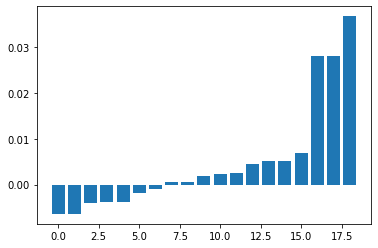

In [24]:
from matplotlib import pyplot

# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()

internationalplan_no -0.00640000000000005
internationalplan_yes -0.006333333333333369
voicemailplan_no -0.004066666666666696
voicemailplan_yes -0.003800000000000059
accountlength -0.0037333333333333884
numbervmailmessages -0.0017333333333333645
totaldayminutes -0.0008666666666666933
totaldaycalls 0.0006666666666666043
totaldaycharge 0.0006666666666666043
totaleveminutes 0.0017999999999999462
totalevecalls 0.0023999999999999577
totalevecharge 0.0025333333333332876
totalnightminutes 0.00459999999999996
totalnightcalls 0.005199999999999971
totalnightcharge 0.005199999999999971
totalintlminutes 0.0067999999999999615
totalintlcalls 0.028133333333333323
totalintlcharge 0.028133333333333323
numbercustomerservicecalls 0.036733333333333305


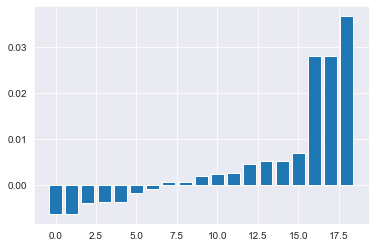

In [25]:
# Create lists
column_labels = X.columns.tolist()
# coef = importance

# Zip together
labels_importance = list(zip(column_labels, importance))
# Sort them
labels_importance.sort(key=lambda y: y[1])

# Verify the result
# print(labels_coef)
for x in labels_importance:
    print(x[0], x[1])
    # print("Feature : {} has score  : {} ".format(index,val))
# for index,val in enumerate(importance):
#    print("Feature : {} has score  : {} ".format(index,val))
    
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)
plt.show()

In [26]:
# Coefficient as feature importance - Logistic Regression / Linear Regression or Regularization

In [27]:
model = LogisticRegression()
model.fit(X,Y)
importance = model.coef_[0]
importance = np.sort(importance)
importance

array([-1.0434809 , -0.94723482, -0.21527153, -0.04139081, -0.04026367,
        0.06741511,  0.07531676,  0.13109155,  0.14180777,  0.14919747,
        0.1611474 ,  0.23945351,  0.24275205,  0.46263104,  0.48888544,
        0.50135129,  0.51647076,  0.94716849,  1.04341456])

In [28]:
for index,val in enumerate(importance):
    print("Feature : {} has score  : {} ".format(index,val))

Feature : 0 has score  : -1.0434808951960952 
Feature : 1 has score  : -0.94723481678266 
Feature : 2 has score  : -0.21527152908933553 
Feature : 3 has score  : -0.041390808828847644 
Feature : 4 has score  : -0.040263667201358426 
Feature : 5 has score  : 0.06741511096446874 
Feature : 6 has score  : 0.07531676104191888 
Feature : 7 has score  : 0.1310915503517227 
Feature : 8 has score  : 0.141807767594883 
Feature : 9 has score  : 0.14919746913649123 
Feature : 10 has score  : 0.1611473978938459 
Feature : 11 has score  : 0.23945351472357443 
Feature : 12 has score  : 0.24275205454398277 
Feature : 13 has score  : 0.4626310449044274 
Feature : 14 has score  : 0.48888543564517584 
Feature : 15 has score  : 0.5013512890208941 
Feature : 16 has score  : 0.5164707643147288 
Feature : 17 has score  : 0.9471684850735964 
Feature : 18 has score  : 1.043414563487047 


internationalplan_no -1.0434808951960952
internationalplan_yes -0.94723481678266
voicemailplan_no -0.21527152908933553
voicemailplan_yes -0.041390808828847644
accountlength -0.040263667201358426
numbervmailmessages 0.06741511096446874
totaldayminutes 0.07531676104191888
totaldaycalls 0.1310915503517227
totaldaycharge 0.141807767594883
totaleveminutes 0.14919746913649123
totalevecalls 0.1611473978938459
totalevecharge 0.23945351472357443
totalnightminutes 0.24275205454398277
totalnightcalls 0.4626310449044274
totalnightcharge 0.48888543564517584
totalintlminutes 0.5013512890208941
totalintlcalls 0.5164707643147288
totalintlcharge 0.9471684850735964
numbercustomerservicecalls 1.043414563487047


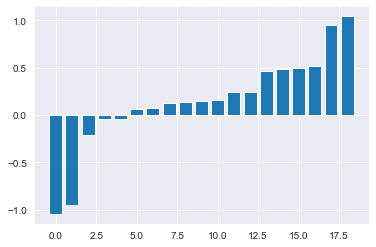

In [29]:
# Create lists
column_labels = X.columns.tolist()
# coef = importance

# Zip together
labels_importance = list(zip(column_labels, importance))
# Sort them
labels_importance.sort(key=lambda y: y[1])

# Verify the result
# print(labels_coef)
for x in labels_importance:
    print(x[0], x[1])
    # print("Feature : {} has score  : {} ".format(index,val))
# for index,val in enumerate(importance):
#    print("Feature : {} has score  : {} ".format(index,val))
    
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)
plt.show()

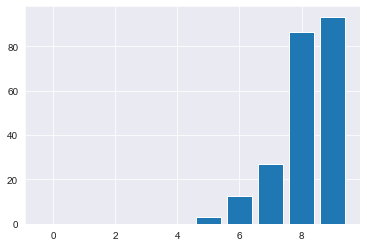

In [30]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
model=LinearRegression()
model.fit(X,y)
importance=model.coef_
importance=np.sort(importance)
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)
plt.show()

In [31]:
# Feature Importance with Decision Trees (CARTS)

In [32]:
# Merging with the original data frame
# Preparing the X variables
X = pd.concat([catDF, numDF], axis=1)
print(X.shape)
# Preparing the Y variable
Y = df['churn']
print(Y.shape)
X.head()

(5000, 19)
(5000,)


,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,1,0,0,1,0.518519,1.470588,1.172414,0.384615,1.172890,-0.053156,-0.037037,-0.053819,0.653392,-0.346154,0.652459,-0.085714,-0.333333,-0.085106,0.0
1,1,0,0,1,0.129630,1.529412,-0.255172,0.884615,-0.255682,-0.081211,0.111111,-0.081597,0.796460,0.115385,0.796721,0.971429,-0.333333,0.978723,0.0
2,1,0,1,0,0.685185,0.000000,0.873103,0.538462,0.873377,-1.178295,0.370370,-1.178819,-0.557522,0.153846,-0.557377,0.542857,0.333333,0.542553,-1.0
3,0,1,1,0,-0.296296,0.000000,1.645517,-1.115385,1.646104,-2.053894,-0.444444,-2.053819,-0.051622,-0.423077,-0.052459,-1.057143,1.000000,-1.063830,1.0
4,0,1,1,0,-0.462963,0.000000,-0.184828,0.500000,-0.185065,-0.778147,0.814815,-0.777778,-0.199115,0.807692,-0.200000,-0.057143,-0.333333,-0.053191,2.0


In [33]:
# Tree models have trouble turning strings to float to labeling the target variable so there is a complete feature matrix
Y = Y.replace(to_replace=['No','Yes'],value=[0,1])

Feature: 0, Score: 0.003599574625859644
Feature: 1, Score: 0.010094827718363572
Feature: 2, Score: 0.013942355159112714
Feature: 3, Score: 0.014154434993955146
Feature: 4, Score: 0.019028738068915783
Feature: 5, Score: 0.01992826254667845
Feature: 6, Score: 0.02215212980574775
Feature: 7, Score: 0.024679001655610454
Feature: 8, Score: 0.030343720207286158
Feature: 9, Score: 0.03494065489968491
Feature: 10, Score: 0.04094021162637725
Feature: 11, Score: 0.04982760163600826
Feature: 12, Score: 0.06421712077912782
Feature: 13, Score: 0.07702669820528482
Feature: 14, Score: 0.09771415981298774
Feature: 15, Score: 0.10526619562550936
Feature: 16, Score: 0.11026099851150324
Feature: 17, Score: 0.12099405642971889
Feature: 18, Score: 0.14088925769226784


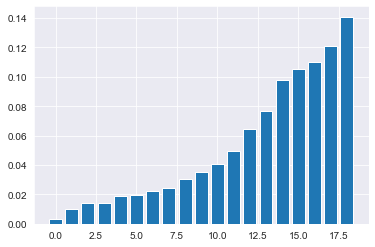

In [34]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X,Y)
importance = model.feature_importances_
importance = np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}, Score: {}'.format(i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

internationalplan_no 0.003599574625859644
internationalplan_yes 0.010094827718363572
voicemailplan_no 0.013942355159112714
voicemailplan_yes 0.014154434993955146
accountlength 0.019028738068915783
numbervmailmessages 0.01992826254667845
totaldayminutes 0.02215212980574775
totaldaycalls 0.024679001655610454
totaldaycharge 0.030343720207286158
totaleveminutes 0.03494065489968491
totalevecalls 0.04094021162637725
totalevecharge 0.04982760163600826
totalnightminutes 0.06421712077912782
totalnightcalls 0.07702669820528482
totalnightcharge 0.09771415981298774
totalintlminutes 0.10526619562550936
totalintlcalls 0.11026099851150324
totalintlcharge 0.12099405642971889
numbercustomerservicecalls 0.14088925769226784


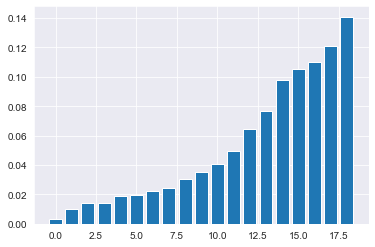

In [35]:
# Create lists
column_labels = X.columns.tolist()
# coef = importance

# Zip together
labels_importance = list(zip(column_labels, importance))
# Sort them
labels_importance.sort(key=lambda y: y[1])

# Verify the result
# print(labels_coef)
for x in labels_importance:
    print(x[0], x[1])
    # print("Feature : {} has score  : {} ".format(index,val))
# for index,val in enumerate(importance):
#    print("Feature : {} has score  : {} ".format(index,val))
    
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar([i for i in range (len(importance))],importance)
plt.show()

In [36]:
# Correlation

In [37]:
df.head(1)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1


In [38]:
# correlation between target and features
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/churn.csv")
(df.corr().loc['churn'].plot(kind='barh', figsize=(4,10)))

KeyError: 'churn'

In [ ]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.show()

In [ ]:
import numpy as np
# variance of numeric features
(df
 .select_dtypes(include=np.number)
 .var()
 .astype('str'))

In [ ]:
# drop uncorrelated numeric features (threshold <0.2)
corr = abs(df.corr().loc['Converted'])
corr = corr[corr<0.4]
cols_to_drop = corr.index.to_list()
df = df.drop(cols_to_drop, axis=1)

In [ ]:
df.head().T